In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
data303X = heart_disease.data.features
data303y = heart_disease.data.targets



In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_heart = fetch_ucirepo(id=145)

# data (as pandas dataframes)
data270X = statlog_heart.data.features
data270y = statlog_heart.data.targets



In [ ]:
data303X = data303X.fillna(data303X.mean())
data303X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [ ]:
data303X['fbs'].unique()

array([1, 0])

In [ ]:
data270X = data270X.fillna(data270X.mean())
data270X.isnull().sum()

age                     0
sex                     0
chest-pain              0
rest-bp                 0
serum-chol              0
fasting-blood-sugar     0
electrocardiographic    0
max-heart-rate          0
angina                  0
oldpeak                 0
slope                   0
major-vessels           0
thal                    0
dtype: int64

In [ ]:
new_column_names = {'age': 'age', 'sex': 'sex','chest-pain': 'cp', 'rest-bp': 'trestbps','serum-chol': 'chol', 'fasting-blood-sugar': 'fbs','electrocardiographic': 'restecg', 'max-heart-rate': 'thalach', 'angina': 'exang', 'oldpeak': 'oldpeak', 'slope': 'slope', 'major-vessels': 'ca', 'thal': 'thal',}
data270X.rename(columns=new_column_names, inplace=True)

new_column_names = {'heart-disease': 'num',}
data270y.rename(columns=new_column_names, inplace=True)
data270y.isnull().sum()

<ipython-input-45-6b20e97982c6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data270y.rename(columns=new_column_names, inplace=True)


num    0
dtype: int64

In [ ]:
data270y['num'].value_counts()
data270y['num'] = data270y['num'].replace(1, 0)
data270y['num'] = data270y['num'].replace(2, 1)
data270y['num'].value_counts()


<ipython-input-9-6ba4f50e6f0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data270y['num'] = data270y['num'].replace(1, 0)
<ipython-input-9-6ba4f50e6f0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data270y['num'] = data270y['num'].replace(2, 1)


num
0    150
1    120
Name: count, dtype: int64

In [ ]:

data303y['num'] = data303y['num'].replace([1, 2, 3, 4], 1)

<ipython-input-10-a391faca34f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data303y['num'] = data303y['num'].replace([1, 2, 3, 4], 1)


In [ ]:


# Assuming df1 and df2 are your two DataFrames
combined_df = pd.concat([data303X, data303y], axis=1)
combined_df.head()


# Assuming df1 and df2 are your two DataFrames
combined_df2 = pd.concat([data270X, data270y], axis=1)
combined_df2.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,0


In [ ]:
combined_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
combined_df = pd.concat([combined_df,combined_df2], axis=0)

In [ ]:
combined_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,54.436300,0.678883,3.165794,131.527051,248.090750,0.148342,1.005236,149.640489,0.328098,1.044503,1.593368,0.671359,4.716350,0.452007
std,9.063965,0.467314,0.954607,17.708934,51.710215,0.355749,0.995606,22.992319,0.469931,1.152631,0.614872,0.936389,1.935155,0.498126
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
combined_df = combined_df.sample(frac=1)

In [ ]:
combined_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
203,51.0,1.0,4.0,140.0,299.0,0.0,0.0,173.0,1.0,1.6,1.0,0.0,7.0,1
7,59.0,1.0,4.0,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,7.0,1
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
51,52.0,1.0,2.0,128.0,205.0,1.0,0.0,184.0,0.0,0.0,1.0,0.0,3.0,0
65,60.0,1.0,4.0,145.0,282.0,0.0,2.0,142.0,1.0,2.8,2.0,2.0,7.0,1


In [ ]:
df = combined_df

In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.096053,0.100733,0.279264,0.214100,0.120859,0.139039,-0.397809,0.094802,0.199296,0.160816,0.357864,0.117284,0.217998
sex,-0.096053,1.000000,0.021578,-0.063592,-0.200712,0.045166,0.029923,-0.061691,0.162163,0.099929,0.043684,0.090013,0.384853,0.286662
cp,0.100733,0.021578,1.000000,-0.039512,0.081010,-0.067400,0.070824,-0.326481,0.369568,0.186013,0.144843,0.229260,0.263737,0.415668
trestbps,0.279264,-0.063592,-0.039512,1.000000,0.150116,0.166002,0.131921,-0.042393,0.073299,0.204946,0.129377,0.092492,0.132907,0.153097
chol,0.214100,-0.200712,0.081010,0.150116,1.000000,0.017038,0.169814,-0.010636,0.069349,0.037867,-0.005216,0.122242,0.020807,0.100144
fbs,0.120859,0.045166,-0.067400,0.166002,0.017038,1.000000,0.061971,0.006531,0.011625,-0.008880,0.052459,0.134387,0.060553,0.005716
restecg,0.139039,0.029923,0.070824,0.131921,0.169814,0.061971,1.000000,-0.079192,0.089738,0.116949,0.146275,0.121219,0.016198,0.175002
thalach,-0.397809,-0.061691,-0.326481,-0.042393,-0.010636,0.006531,-0.079192,1.000000,-0.379333,-0.345851,-0.386168,-0.264328,-0.266586,-0.417771
exang,0.094802,0.162163,0.369568,0.073299,0.069349,0.011625,0.089738,-0.379333,1.000000,0.281878,0.256821,0.148814,0.325010,0.425871
oldpeak,0.199296,0.099929,0.186013,0.204946,0.037867,-0.008880,0.116949,-0.345851,0.281878,1.000000,0.592442,0.275894,0.332873,0.421336


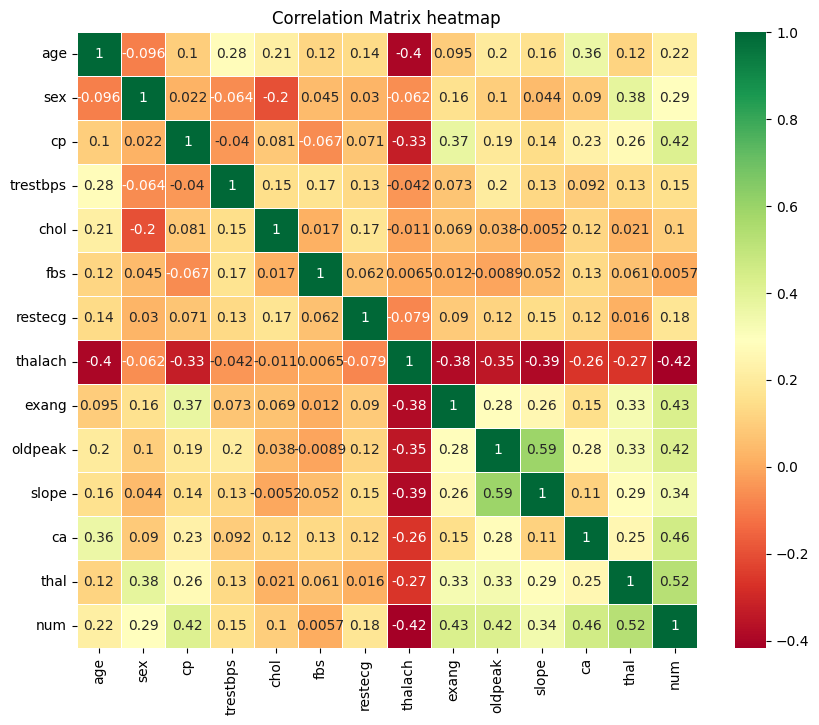

In [ ]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=.5)
plt.title('Correlation Matrix heatmap')
plt.show()

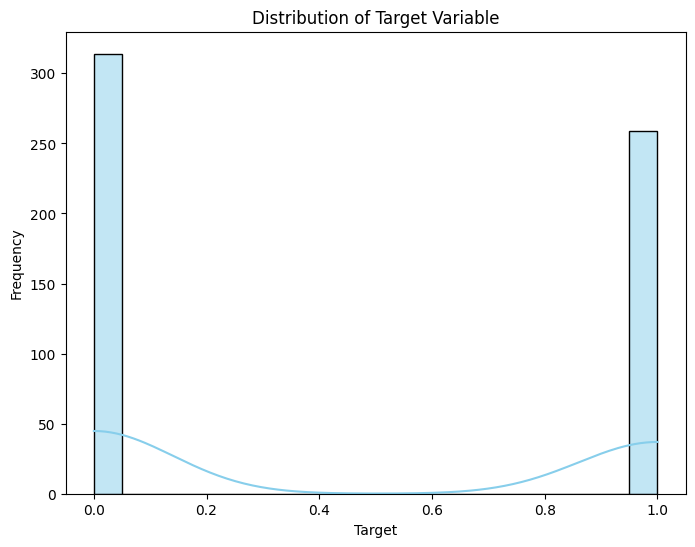

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['num'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

In [ ]:
median = df.median()
median

age          55.0
sex           1.0
cp            3.0
trestbps    130.0
chol        243.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
num           0.0
dtype: float64

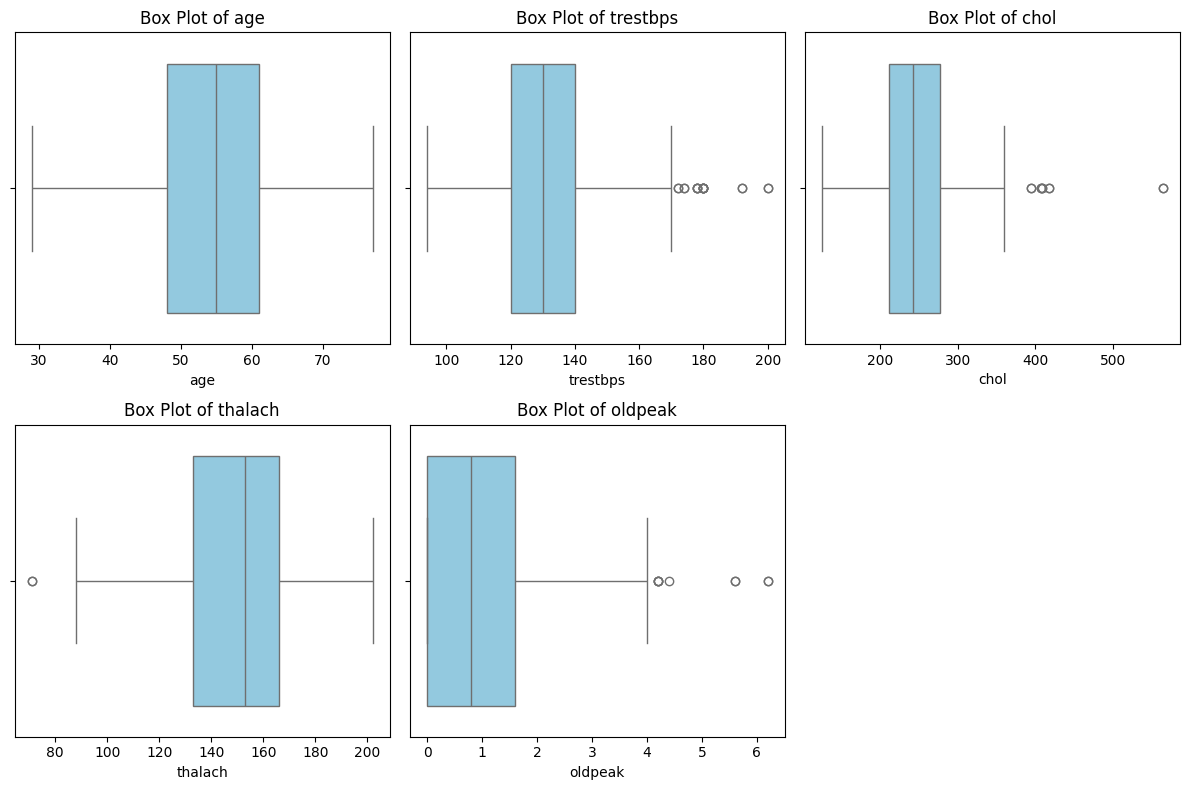

In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
bins = [29, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
combined_df['age_category'] = pd.cut(combined_df['age'], bins=bins, labels=labels, right=False)

In [ ]:
df['total_risk'] = df['trestbps'] + df['chol']
combined_df['total_risk'] = combined_df['trestbps'] + combined_df['chol']

In [ ]:
threshold_heart_rate = 150
df['exercise_angina'] = (df['exang'] == 1) & (df['thalach'] > threshold_heart_rate)
combined_df['exercise_angina'] = (combined_df['exang'] == 1) & (combined_df['thalach'] > threshold_heart_rate)

In [ ]:
df['cholesterol_hdl_ratio'] = df['chol'] / df['thalach']
combined_df['cholesterol_hdl_ratio'] = combined_df['chol'] / combined_df['thalach']

In [ ]:
df['num'] = df['num'].apply(lambda x: 1 if x >= 0.5 else 0)
combined_df['num'] = combined_df['num'].apply(lambda x: 1 if x >= 0.5 else 0)

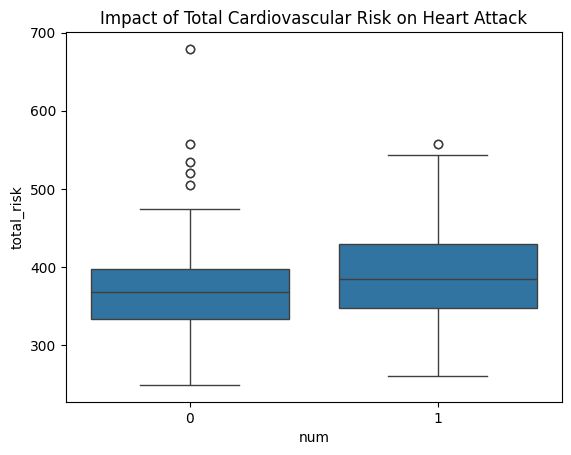

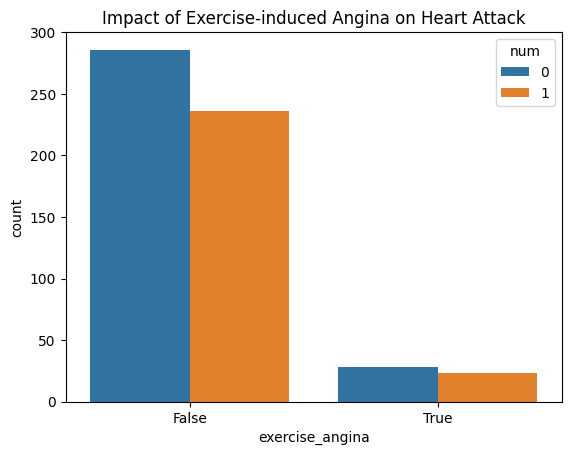

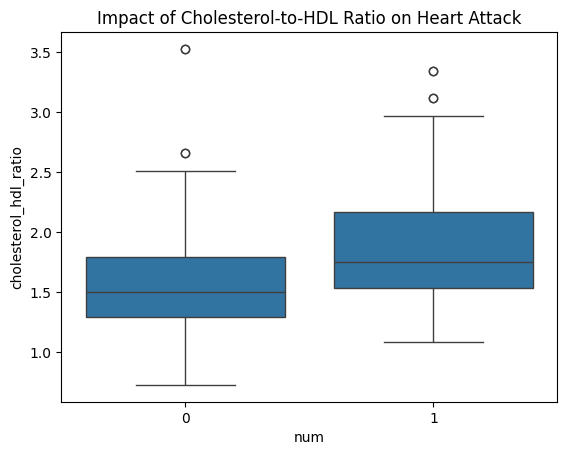

In [ ]:
sns.boxplot(x='num', y='total_risk', data=df)
plt.title('Impact of Total Cardiovascular Risk on Heart Attack')
plt.show()

sns.countplot(x='exercise_angina', hue='num', data=df)
plt.title('Impact of Exercise-induced Angina on Heart Attack')
plt.show()

sns.boxplot(x='num', y='cholesterol_hdl_ratio', data=df)
plt.title('Impact of Cholesterol-to-HDL Ratio on Heart Attack')
plt.show()

In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_category,total_risk,exercise_angina,cholesterol_hdl_ratio
92,62.0,1.0,3.0,130.0,231.0,0.0,0.0,146.0,0.0,1.8,2.0,3.0,7.0,0,Senior,361.0,False,1.582192
28,43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0,0,Young,397.0,False,1.444444
281,47.0,1.0,3.0,130.0,253.0,0.0,0.0,179.0,0.0,0.0,1.0,0.0,3.0,0,Middle-aged,383.0,False,1.413408
207,50.0,1.0,4.0,144.0,200.0,0.0,2.0,126.0,1.0,0.9,2.0,0.0,7.0,1,Middle-aged,344.0,False,1.587302
147,40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,1,Young,277.0,False,1.464912
59,62.0,1.0,2.0,120.0,281.0,0.0,2.0,103.0,0.0,1.4,2.0,1.0,7.0,1,Senior,401.0,False,2.728155
50,42.0,1.0,4.0,136.0,315.0,0.0,0.0,125.0,1.0,1.8,2.0,0.0,6.0,1,Young,451.0,False,2.520000
183,42.0,0.0,4.0,102.0,265.0,0.0,2.0,122.0,0.0,0.6,2.0,0.0,3.0,0,Young,367.0,False,2.172131
235,54.0,1.0,4.0,122.0,286.0,0.0,2.0,116.0,1.0,3.2,2.0,2.0,3.0,1,Middle-aged,408.0,False,2.465517
96,66.0,1.0,4.0,120.0,302.0,0.0,2.0,151.0,0.0,0.4,2.0,0.0,3.0,0,Senior,422.0,False,2.000000


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,total_risk,cholesterol_hdl_ratio
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,54.436300,0.678883,3.165794,131.527051,248.090750,0.148342,1.005236,149.640489,0.328098,1.044503,1.593368,0.671359,4.716350,0.452007,379.617801,1.703538
std,9.063965,0.467314,0.954607,17.708934,51.710215,0.355749,0.995606,22.992319,0.469931,1.152631,0.614872,0.936389,1.935155,0.498126,57.118165,0.464572
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,249.000000,0.728324
25%,48.000000,0.000000,3.000000,120.000000,212.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,338.000000,1.363095
50%,55.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,375.000000,1.606061
75%,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000,415.000000,1.921569
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,679.000000,3.525000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop(columns=['age_category','num'])
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
Lr_model = LogisticRegression(random_state=42)

# Train the model on the training set
Lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = Lr_model.predict(X_test_scaled)

# Evaluate the model
train_accuracy = Lr_model.score(X_train, y_train)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Training Accuracy: 0.85
Testing Accuracy: 0.88

Confusion Matrix:
[[57  6]
 [ 8 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        63
           1       0.88      0.85      0.86        52

    accuracy                           0.88       115
   macro avg       0.88      0.88      0.88       115
weighted avg       0.88      0.88      0.88       115



In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Features and target variable
X = df.drop(columns=['age_category','num'])
y = df['num']


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Random Forest Classifier model
rfmodel = RandomForestClassifier(random_state=42,max_depth=5)
'''
,max_depth=10,min_samples_split=5, min_samples_leaf=2,n_estimators=100
'''
# Train the model on the training set
rfmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate training accuracy
train_accuracy = rfmodel.score(X_train, y_train)

print(f'Training Accuracy: {train_accuracy:.2f}')


print(f'Testing Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)



#save training records in a file
#try deep learning (search for optimal equation for hidden layer or try different combinations)

Training Accuracy: 0.95
Testing Accuracy: 0.91

Confusion Matrix:
[[60  3]
 [ 7 45]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        52

    accuracy                           0.91       115
   macro avg       0.92      0.91      0.91       115
weighted avg       0.91      0.91      0.91       115



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target variable
X = df.drop(columns=['age_category','num'])
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier model
gbmodel = GradientBoostingClassifier(random_state=42,n_estimators=50)

# Train the model on the training set
gbmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_train = gbmodel.predict(X_train)
y_pred = gbmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
classification_rep = classification_report(y_test, y_pred)


# Calculate training accuracy
train_accuracy = gbmodel.score(X_train, y_train)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print("\nClassification Report:\n")
print(classification_rep)


Training Accuracy: 0.98
Testing Accuracy: 0.96

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.96      0.94      0.95        52

    accuracy                           0.96       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.96      0.96      0.96       115



In [ ]:
# Save as Excel file
df.to_excel('panda_data.xlsx', index=False)  # Optional: index=False to exclude row index

# Save as CSV file
df.to_csv('panda_data.csv', index=False)

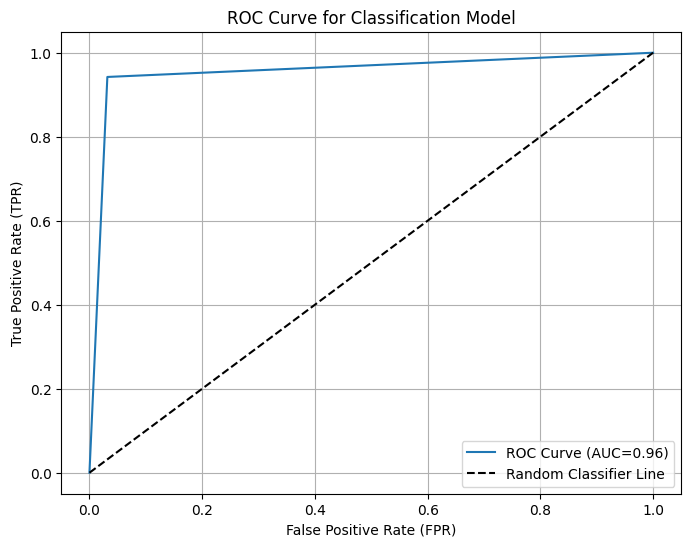

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC=%0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier Line')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Classification Model')
plt.legend()
plt.grid(True)
plt.show()

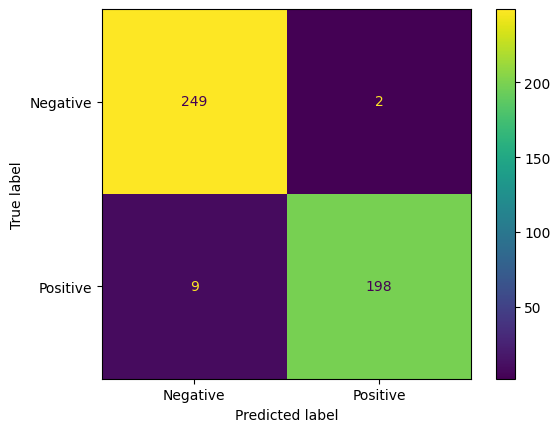

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train, display_labels=['Negative', 'Positive'])

# Plot the confusion matrix
disp.plot()
plt.show()

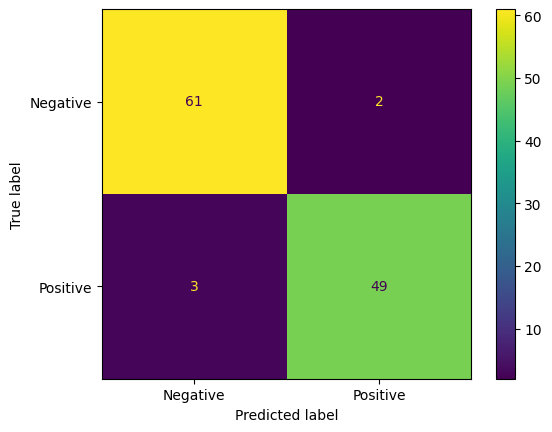

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])

# Plot the confusion matrix
disp.plot()
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target variable
X = df.drop(columns=['age_category','num'])
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Extreme Gradient Boosting (XGBoost) model
xgbmodel = xgb.XGBClassifier(random_state=42,n_estimators=50,max_depth=3)

# Train the model on the training set
xgbmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgbmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculate training accuracy
train_accuracy = xgbmodel.score(X_train, y_train)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Training Accuracy: 1.00
Testing Accuracy: 0.94

Confusion Matrix:
[[59  2]
 [ 5 49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        61
           1       0.96      0.91      0.93        54

    accuracy                           0.94       115
   macro avg       0.94      0.94      0.94       115
weighted avg       0.94      0.94      0.94       115



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Calculate training accuracy
train_accuracy = dt_model.score(X_train, y_train)


# Print the results
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Training Accuracy: 1.00
Testing Accuracy: 0.97
Confusion Matrix:
 [[59  2]
 [ 2 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        61
           1       0.96      0.96      0.96        54

    accuracy                           0.97       115
   macro avg       0.97      0.97      0.97       115
weighted avg       0.97      0.97      0.97       115



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(columns=[ 'age_category','num'])
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Create a Support Vector Classifier model
svm_model = SVC(kernel='linear', random_state=42)  # Use a linear kernel because i dont know what they used

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

#getting training accuracy
train_accuracy = dt_model.score(X_train, y_train)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


#print results
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Training Accuracy: 1.00
Testing Accuracy: 0.81

Confusion Matrix:
[[204  50]
 [ 38 167]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       254
           1       0.77      0.81      0.79       205

    accuracy                           0.81       459
   macro avg       0.81      0.81      0.81       459
weighted avg       0.81      0.81      0.81       459



<ipython-input-70-13d8298fdf8c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


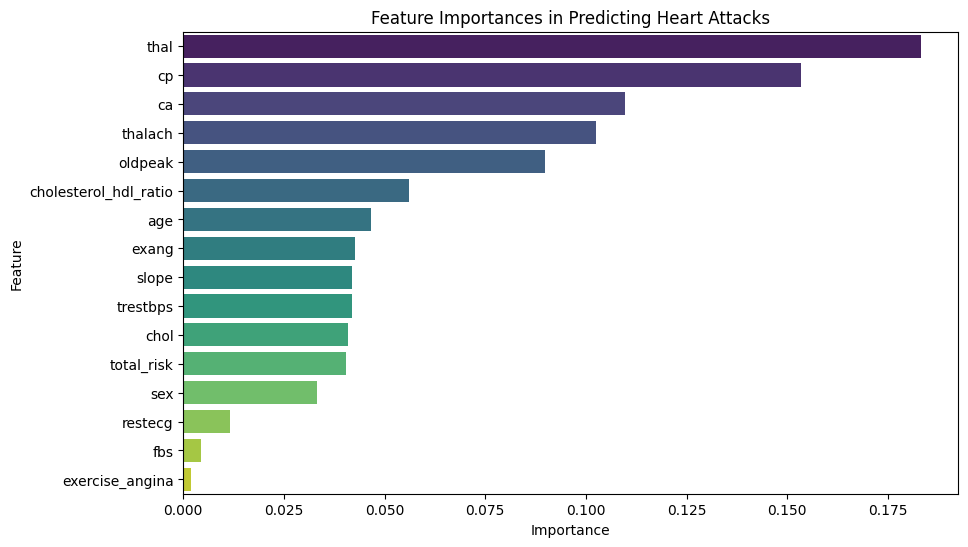

In [ ]:
# Get feature importances
feature_importances = rfmodel.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances in Predicting Heart Attacks')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

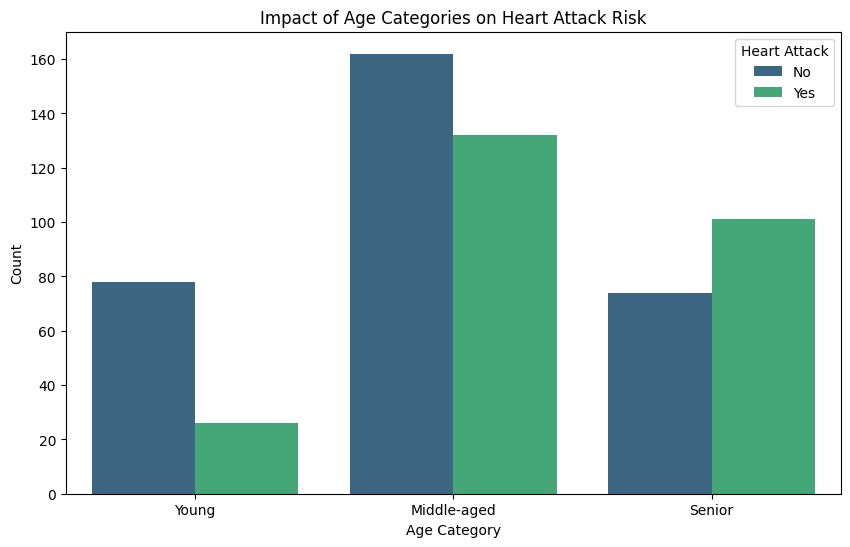

In [ ]:
# Create a countplot to visualize the impact of age categories on heart attack risk
plt.figure(figsize=(10, 6))
sns.countplot(x='age_category', hue='num', data=df, palette='viridis')
plt.title('Impact of Age Categories on Heart Attack Risk')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

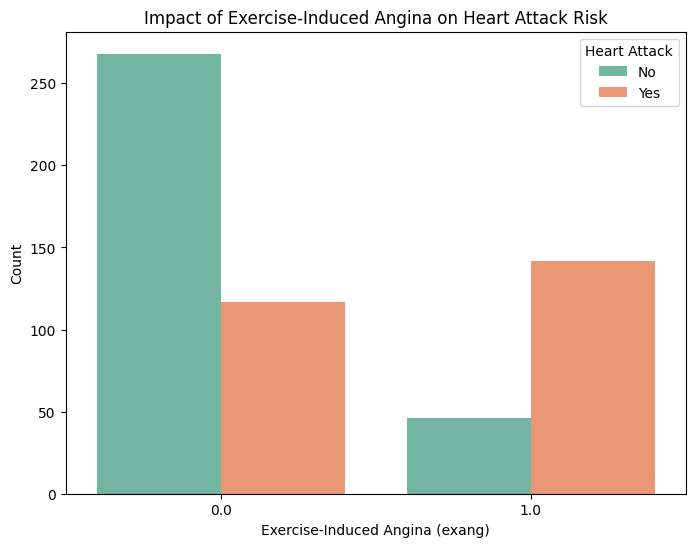

In [ ]:
# Create a countplot to visualize the impact of exercise-induced angina on heart attack risk
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='num', data=df, palette='Set2')
plt.title('Impact of Exercise-Induced Angina on Heart Attack Risk')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title='Heart Attack', labels=['No', 'Yes'])
plt.show()

In [ ]:
data = {
    'age': [45, 55, 65, 40, 50],
    'sex': [1, 0, 1, 0, 1],
    'chol': [240, 200, 220, 180, 210],
    'trestbps': [140, 120, 130, 110, 125],
    'thalach': [150, 160, 140, 170, 155],
    'exang': [0, 1, 0, 0, 1],
    'oldpeak': [1.5, 2.0, 1.0, 0.5, 2.5],

}



df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]




# Create a DataFrame
new_data = pd.DataFrame(data)

In [ ]:
new_predictions = rfmodel.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ca
- cholesterol_hdl_ratio
- cp
- exercise_angina
- fbs
- ...


In [ ]:
new_predictions = dt_model.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

New Predictions:
  Prediction_Label
0     Heart attack
1  No heart attack
2     Heart attack
3     Heart attack
4  No heart attack


In [ ]:
new_predictions = Lr_model.predict(new_data)

# Display the predictions
prediction_df = pd.DataFrame({'Prediction': new_predictions})

# Display the predictions with human-readable labels
prediction_df['Prediction_Label'] = prediction_df['Prediction'].apply(lambda x: 'Heart attack' if x == 1 else 'No heart attack')

# Print the updated predictions
print("New Predictions:")
print(prediction_df[['Prediction_Label']])

New Predictions:
  Prediction_Label
0  No heart attack
1  No heart attack
2  No heart attack
3     Heart attack
4  No heart attack


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred)
auc = roc_auc_score(y, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC=%0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Random classifier line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Classification Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""Untitled0.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/11IYUtSRj--5qwdpVrfaBgztBh062YgMH
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Specify the path to your CSV file
file_path = "panda_data.csv"  # Replace with your actual file path

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Now you can work with the data in the DataFrame 'df'
print(df.head(5))  # Print the first few rows of the DataFrame

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and target variable
X = df.drop(columns=['age_category','num'])
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier model
gbmodel = GradientBoostingClassifier(random_state=42,n_estimators=50)

# Train the model on the training set
gbmodel.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_train = gbmodel.predict(X_train)
y_pred = gbmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
classification_rep = classification_report(y_test, y_pred)


# Calculate training accuracy
train_accuracy = gbmodel.score(X_train, y_train)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix training:')
print(conf_matrix_train)
print('\nConfusion Matrix testing:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  51.0  1.0  4.0     140.0  299.0  0.0      0.0    173.0    1.0      1.6   
1  59.0  1.0  4.0     110.0  239.0  0.0      2.0    142.0    1.0      1.2   
2  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
3  52.0  1.0  2.0     128.0  205.0  1.0      0.0    184.0    0.0      0.0   
4  60.0  1.0  4.0     145.0  282.0  0.0      2.0    142.0    1.0      2.8   

   slope   ca  thal  num age_category  total_risk  exercise_angina  \
0    1.0  0.0   7.0    1  Middle-aged       439.0             True   
1    2.0  1.0   7.0    1  Middle-aged       349.0            False   
2    2.0  3.0   3.0    1       Senior       452.0            False   
3    1.0  0.0   3.0    0  Middle-aged       333.0            False   
4    2.0  2.0   7.0    1       Senior       427.0            False   

   cholesterol_hdl_ratio  
0               1.728324  
1               1.683099  
2               2.954128  
3       

In [ ]:
# Example data

data = {
    'age': [51],
    'sex': [1],
    'cp': [4],
    'trestbps': [140],
    'chol': [299],
    'fbs': [0],
    'restecg': [0],
    'thalach': [173],
    'exang': [1],
    'oldpeak': [1.6],
    'slope': [1],
    'ca': [3],
    'thal': [6],
    'total_risk': [439],
    'exercise_angina': [True],
    'cholesterol_hdl_ratio': [1.728],

}

# Create DataFrame
df_new = pd.DataFrame(data)

new_predictions = gbmodel.predict(df_new)

# Print the predictions
print(new_predictions)

[1]


SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd

X = df.drop(columns=[ 'age_category','num'])
y = df['num']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Create a Support Vector Classifier model
svm_model = SVC(kernel='linear', random_state=42)  # Use a linear kernel because i dont know what they used

# Train the model on the training set
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

#getting training accuracy
train_accuracy = svm_model.score(X_train, y_train)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


#print results
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Training Accuracy: 0.88
Testing Accuracy: 0.79

Confusion Matrix:
[[198  57]
 [ 38 166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       255
           1       0.74      0.81      0.78       204

    accuracy                           0.79       459
   macro avg       0.79      0.80      0.79       459
weighted avg       0.80      0.79      0.79       459



Random Forest

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Calculate training accuracy
train_accuracy = dt_model.score(X_train, y_train)


# Print the results
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {accuracy:.2f}')
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Training Accuracy: 1.00
Testing Accuracy: 0.73
Confusion Matrix:
 [[185  70]
 [ 53 151]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       255
           1       0.68      0.74      0.71       204

    accuracy                           0.73       459
   macro avg       0.73      0.73      0.73       459
weighted avg       0.74      0.73      0.73       459

